# Understanding Vocabulary

In its simplest form, TFIDF and document clustering are all done using a `bag of words` model. This means that terms are only aware of their relation to a document, not eachother. We are unable to ask if a term preceeds another in a document, but we must rather ask if two terms co-occur in a document.

In our definitions a term is any complete string represented in our collection of documents. The set of all tokens from all documents is our vocabulary. There are many ways to define tokens for a vocabulary. The simplest being that every word is included, as found in the original text. This has obvious drawbacks, like in words with suffixes. The terms `help`, `helping`, `Help` all have the same meaning, and therefore should all map to a single term in our vocabulary.

In [104]:
from nltk import word_tokenize

document = """
Through three cheese trees three free fleas flew
While these fleas flew freezy breeze blew
Freezy breeze made these three trees freeze
Freezy trees made these trees cheese freeze
Thats what made these three free fleas sneeze
"""

vocabulary = np.array(list(set(word_tokenize(document))))
print('We have', vocabulary.size, 'terms in our vocabulary!')
print(*sorted(vocabulary), sep='\n')

We have 18 terms in our vocabulary!
Freezy
Thats
Through
While
blew
breeze
cheese
fleas
flew
free
freeze
freezy
made
sneeze
these
three
trees
what


# Stemming

The traditional way to reduce this term set is by stemming our words. Stemming algorithms are impirically built to truncate words to common form.

In [105]:
from nltk.stem.snowball import SnowballStemmer
from collections import defaultdict

language = 'english'
stemmer = SnowballStemmer(language)

reverse_stemmer = defaultdict(list)

for word in vocabulary:
    stem = stemmer.stem(word)
    reverse_stemmer[stem].append(word)

print('We have', len(reverse_stemmer), 'terms in our vocabulary!')
print(*sorted(reverse_stemmer), sep='\n')

We have 17 terms in our vocabulary!
blew
breez
chees
flea
flew
free
freez
freezi
made
sneez
that
these
three
through
tree
what
while


# Evaluation - Levinshtein Distance

In order to evaluate the effectiveness of this algorithm, we must check to see if there exists a pair of terms that should share a common truncation. In this example we can see that `Freezy`/`freezy` both truncated to `freezi`, and `freeze` truncates to `freez`.

One way to find likely candidates for truncation is through edit distance from one word to another. The edit distance we use is called **levinshtein distance**.

In [120]:
from leven import levenshtein
from scipy.spatial.distance import pdist, squareform
import numpy as np

def distance_matrix(terms):
    transformed_strings = np.array(list(terms)).reshape(-1,1)
    distances = pdist(transformed_strings, lambda a, b: levenshtein(a[0], b[0]))
    matrix = squareform(distances)
    return matrix

In [118]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_distance_matrix(matrix, terms, cutoff=2):
    fig, ax = plt.subplots(1,1)
    fig.autofmt_xdate()

    plt.imshow(matrix < cutoff)
    ax.set_xticks(np.arange(len(terms)))
    ax.set_xticklabels(terms)
    ax.set_yticks(np.arange(len(terms)))
    ax.set_yticklabels(terms)
    _ = plt.show()


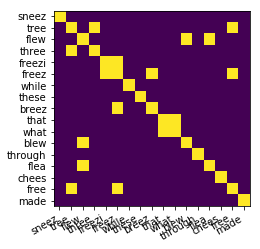

In [119]:
stemmer_matrix = distance_matrix(reverse_stemmer)
plot_distance_matrix(stemmer_matrix, reverse_stemmer)

word_matrix = distance_matrix(vocabulary)
plot_distance_matrix(stemmer_matrix, reverse_stemmer)